In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
from numpy import zeros,zeros_like,array
from mpl_toolkits.axes_grid1 import ImageGrid

In [28]:
from tqdm import tqdm
from math import floor
import cv2

#from numba import njit

#@njit
def imhist(input_array):
    m, n = input_array.shape
    h = [0.0] * 256
    for i in range(m):
        for j in range(n):
            h[int(input_array[i, j])]+=1
    return np.array(h)/(m*n)

#@njit
def calcCLAHEVal(input_array,th):
    r,c = input_array.shape
    H = imhist(input_array)
    #plt.figure()
    #plt.plot(H,label="Histogram before threshold")
    C = zeros_like(H)
    for i in range(256):
        if H[i] > th:
            H[i] = th
    contrastArea = 1 - sum(H)
    height = contrastArea/256
    H = H + height
    C[0] = H[0]
    
    for i in range(1,256):
        C[i] = C[i-1] + (H[i])

    #plt.plot(H,label="Histogram after threshold")
    #plt.plot(C,label = "CDF")
    #plt.legend()
    #plt.show()
    return C

#@njit
def myCLAHE(input_file,window_x,window_y,threshold,cmap):
    name = input_file.split(".")[2]
    input_image = mpimg.imread(input_file)
    output_image = zeros_like(input_image)
    d=1
    if len(input_image.shape)<3:
        r,c = input_image.shape
    else:
        r,c,d = input_image.shape

    
    if d==1:
        new_image = input_image*255
        
        for i in tqdm(range(r)):
            for j in range(c):
                min_x = max(0,i-window_x)
                min_y = max(0,j-window_y)
                max_x = min(r,i+window_x)
                max_y = min(c,j+window_y)
                
                window_image = input_image[min_x:max_x,min_y:max_y]*255
                if new_image[i,j]!=0:
                    x = calcCLAHEVal(window_image,threshold)
                    output_image[i,j] = x[int(new_image[i,j])]
                
    else:
        input_image = cv2.imread(input_file,)
        output_lab = np.zeros_like(input_image)
        lab_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2LAB)
        l_channel,a_channel,b_channel = cv2.split(lab_image)
        print(np.max(l_channel))
        out_l_channel = l_channel.copy()
        
        for i in tqdm(range(r)):
            for j in range(c):
                min_x = max(0,i-window_x)
                min_y = max(0,j-window_y)
                max_x = min(r,i+window_x)
                max_y = min(c,j+window_y)
                
                window_image = l_channel[min_x:max_x,min_y:max_y]
                if out_l_channel[i,j]!=0:
                    x = calcCLAHEVal(window_image,threshold)
                    out_l_channel[i,j] = x[int(l_channel[i,j])]
        
        
#         new_image = input_image.copy()
#         for k in range(d):
#             for i in tqdm(range(r)):
#                 for j in range(c):
#                     new_image[i,j,k] = input_image[i,j,k]*255
#                     min_x = max(0,i-window_x)
#                     min_y = max(0,j-window_y)
#                     max_x = min(r,i+window_x)
#                     max_y = min(c,j+window_y)

#                     window_image = input_image[min_x:max_x,min_y:max_y,k]*255
#                     if new_image[i,j,k]!=0:
#                         x = calcCLAHEVal(window_image,threshold)
                        
#                         output_image[i,j,k] = x[int(new_image[i,j,k])]
            output_lab[:,:,0] = out_l_channel
            output_lab[:,:,1] = a_channel
            output_lab[:,:,2] = b_channel
            
            output_image = cv2.cvtColor(output_lab,cv2.COLOR_LAB2RGB)
            #print("Finished looping through dimension : ",k+1)
                    
#     fig,axes = plt.subplots(1,2, constrained_layout=True, gridspec_kw={'width_ratios':[1,1]})
#     axes[0].imshow(input_image,cmap=cmap)
#     axes[0].axis("on")
#     axes[1].imshow(output_image/255.0,cmap=cmap)
#     axes[1].axis("on")
#     plt.show()
#     plt.imshow(output_image,cmap=cmap)
#     plt.axis("off")
    #output_image = cv2.cvtColor(output_image,cv2.COLOR_BGR2RGB)
    plt.imshow(output_image)
#     if d<3:
#         plt.imsave(".." + name+"CLAHE.png",output_image,cmap=cmap)
#     else:
#         plt.imsave(".." + name+"CLAHE.png",output_image)

In [13]:
input_file = "../data/barbara.png"
myCLAHE(input_file,4,4,0.005,"gray")

100%|██████████| 512/512 [01:41<00:00,  5.04it/s]


In [19]:
input_file = "../data/TEM.png"
myCLAHE(input_file,16,16,0.01,"gray")

100%|██████████| 546/546 [06:11<00:00,  1.47it/s]


In [7]:
input_file = "../data/church.png"
myCLAHE(input_file,16,16,0.05,"gray")

  0%|          | 1/1200 [00:01<20:45,  1.04s/it]

Finished looping through dimension :  1


  0%|          | 1/1200 [00:01<21:01,  1.05s/it]

Finished looping through dimension :  2


100%|██████████| 1200/1200 [24:33<00:00,  1.23s/it]


Finished looping through dimension :  3


  0%|          | 0/348 [00:00<?, ?it/s]

253


100%|██████████| 348/348 [02:02<00:00,  2.85it/s]


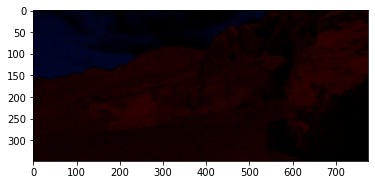

In [29]:
input_file = "../data/canyon.png"
myCLAHE(input_file,8,8,0.015,"gray")